In [2]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading the data and storing in a dataframe
df=pd.read_csv('C:/Users/Aishwarya/OneDrive/Desktop/COVID19.csv')

df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
df.shape

(187, 15)

In [13]:
print(df.isnull().sum())
df=df.dropna()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [29]:
aggregating=df.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
aggregating.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242


In [27]:
print(df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [8]:
aggregating.shape


(187, 14)

<Figure size 1400x700 with 0 Axes>

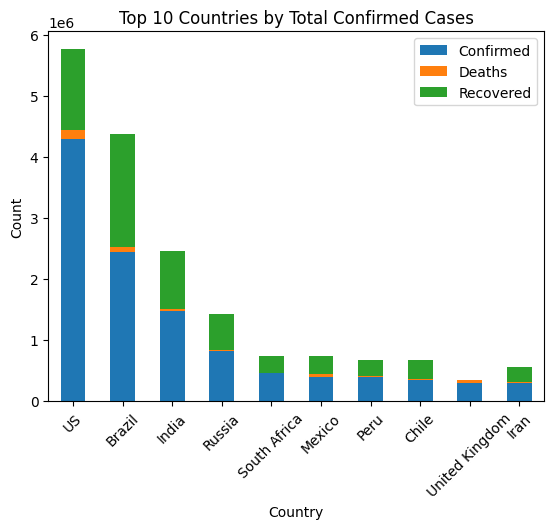

<Figure size 1400x700 with 0 Axes>

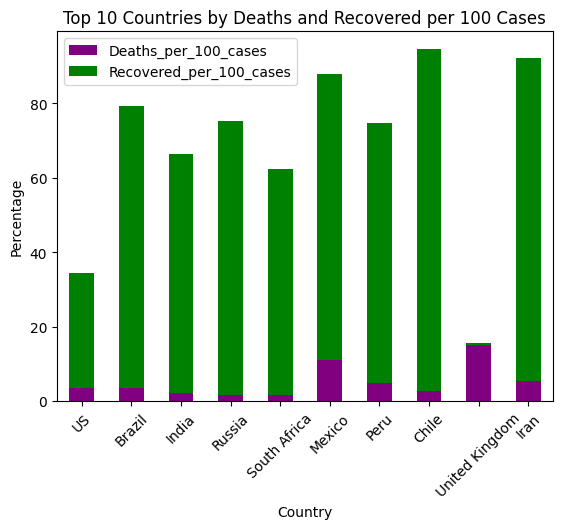

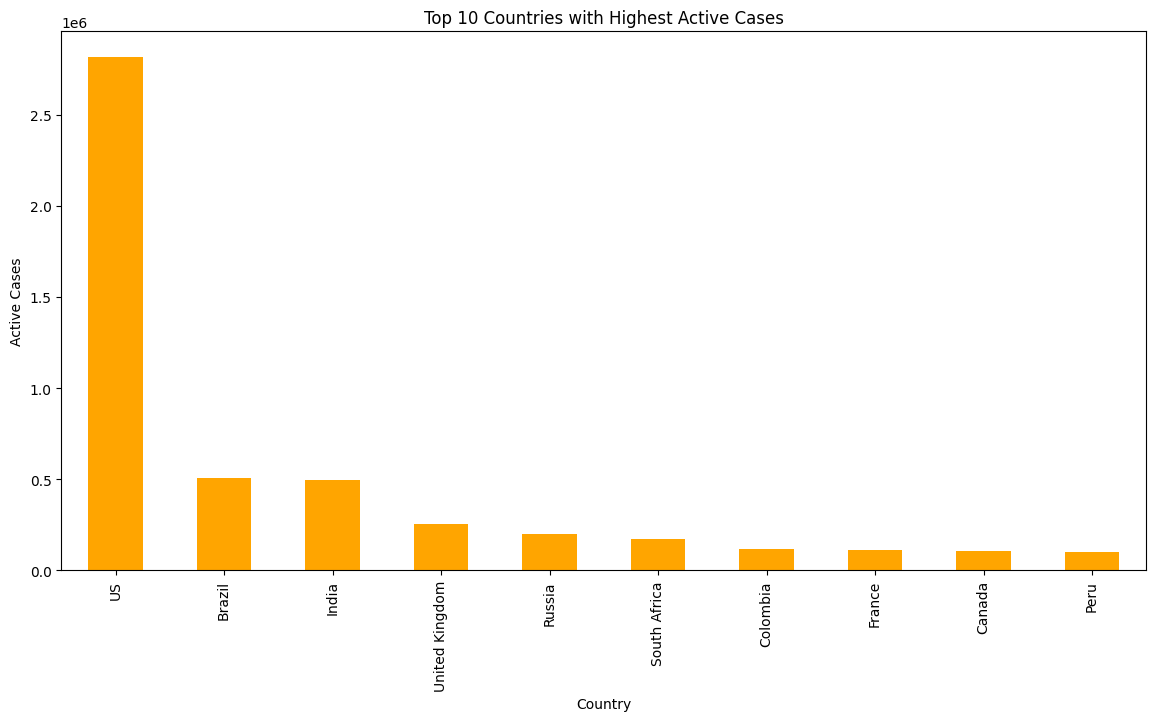

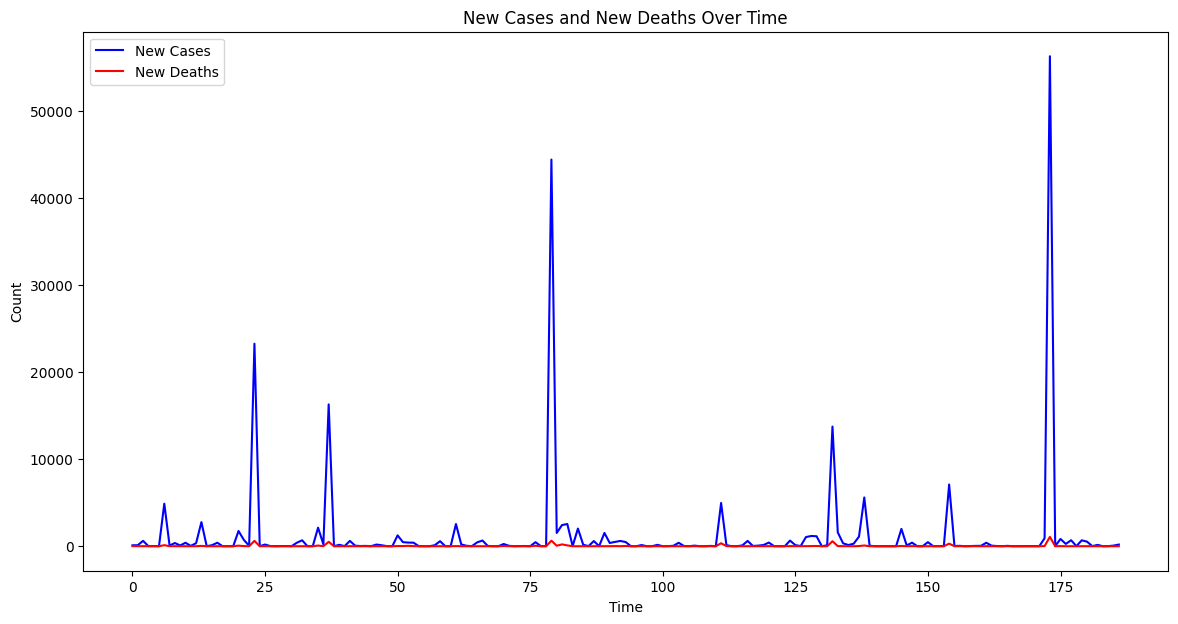

In [38]:
aggregating['Deaths_per_100_cases'] = (aggregating['Deaths'] / aggregating['Confirmed']) * 100
aggregating['Recovered_per_100_cases'] = (aggregating['Recovered'] / aggregating['Confirmed']) * 100

# Visualization

top_n = 10  #Visualizing the Top 10
top_countries = aggregating.sort_values(by='Confirmed', ascending=False).head(top_n)

# Total Confirmed, Deaths, and Recovered by Country
plt.figure(figsize=(14, 7))
top_countries.set_index('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].plot(kind='bar', stacked=True)
plt.title(f'Top {top_n} Countries by Total Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Deaths and Recovered per 100 Cases by Country
plt.figure(figsize=(14, 7))
top_countries[['Country/Region', 'Deaths_per_100_cases', 'Recovered_per_100_cases']].set_index('Country/Region').plot(kind='bar', stacked=True, color=['purple', 'green'])
plt.title(f'Top {top_n} Countries by Deaths and Recovered per 100 Cases')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Active cases by country
plt.figure(figsize=(14, 7))
df.groupby('Country/Region')['Active'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries with Highest Active Cases')
plt.xlabel('Country')
plt.ylabel('Active Cases')
plt.xticks(rotation=90)
plt.show()

# New cases and new deaths over time
plt.figure(figsize=(14, 7))
plt.plot(df['New cases'], label='New Cases', color='blue')
plt.plot(df['New deaths'], label='New Deaths', color='red')
plt.title('New Cases and New Deaths Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=187)


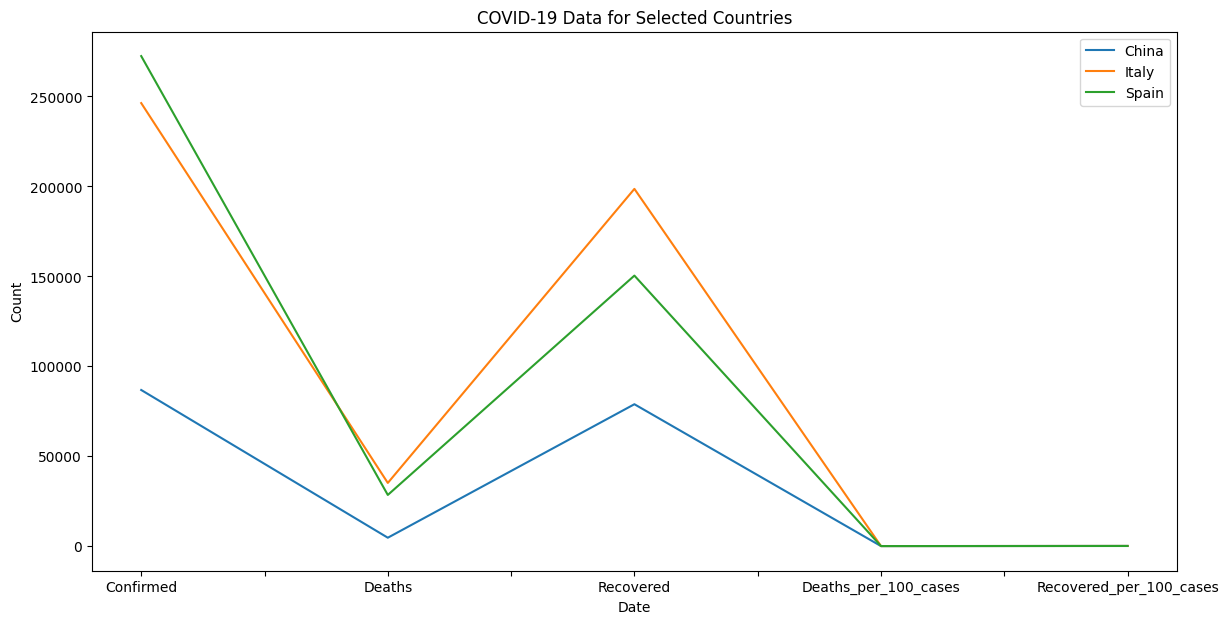

In [39]:
aggregating.set_index('Country/Region', inplace=True)

# Verify index values
print(aggregating.index)

# Plotting data for specific countries
plt.figure(figsize=(14, 7))
aggregating.loc['China'].plot(label='China')
aggregating.loc['Italy'].plot(label='Italy')
aggregating.loc['Spain'].plot(label='Spain')

plt.legend()
plt.title('COVID-19 Data for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [43]:
aggregating = df.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

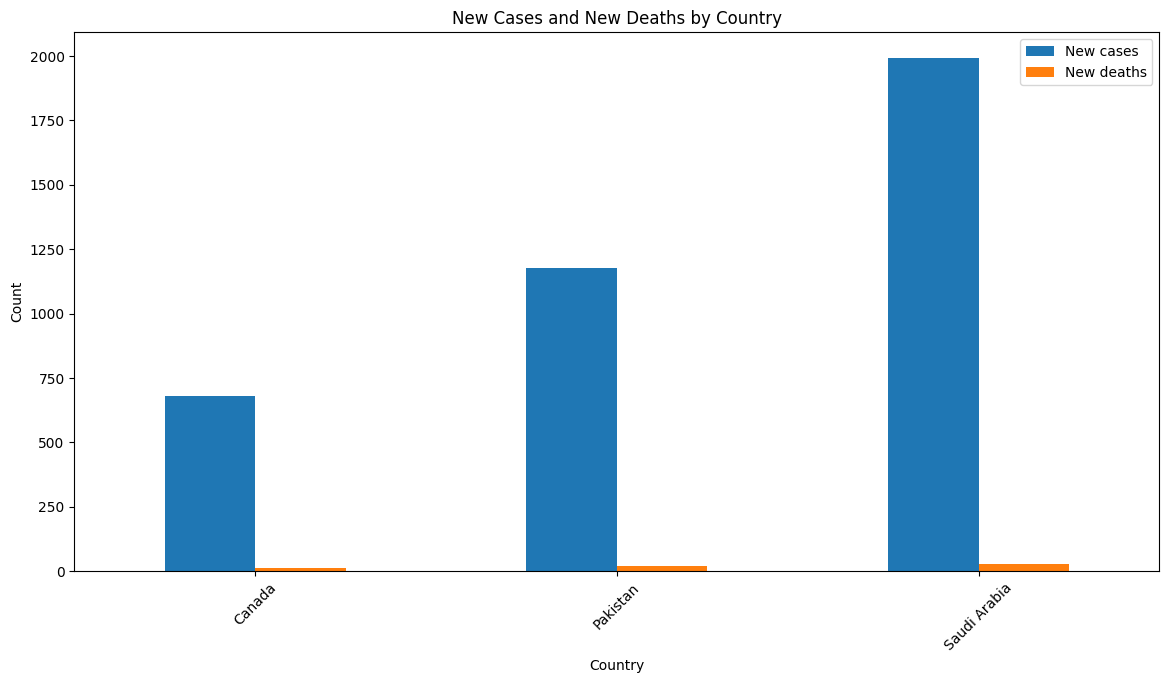

In [53]:
aggregating.columns = aggregating.columns.str.strip()

selected_countries = ['Saudi Arabia', 'Pakistan', 'Canada']

data_to_plot = df[df['Country/Region'].isin(selected_countries)]

data_to_plot.set_index('Country/Region')[['New cases', 'New deaths']].plot(kind='bar', figsize=(14, 7))
plt.title('New Cases and New Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
# The country with the maximum confirmed cases
max_infection_country = df.loc[df['Confirmed'].idxmax()]

print("Country with the maximum number of confirmed cases:")
print(max_infection_country[['Country/Region', 'Confirmed']])

Country with the maximum number of confirmed cases:
Country/Region         US
Confirmed         4290259
Name: 173, dtype: object
